### All about the Imports

In [1]:
import pandas as pd
import calendar
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import warnings
warnings.filterwarnings("ignore")
import time
from bs4 import BeautifulSoup
import requests 
import seaborn as sns

Personal list needs to be organized as only directors are currently relevents

In [2]:
directors = pd.read_csv('data/zippedData/imdb.name.basics.csv.gz', compression = 'gzip')

In [3]:
directors.head()

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


In [4]:
#format profession to list
directors['primary_profession'] = directors['primary_profession'].str.split(',').tolist()
directors = directors.dropna(subset = ['primary_profession'])

In [5]:
#test for primary profession including director
def is_director(dir_list):
    if 'director' in dir_list:
        return True;
    else:
        return False;

directors['is_director'] = directors['primary_profession'].apply(is_director)

In [6]:
#remove non directors
directors = directors.loc[directors['is_director']==True]



Should filter out directors we lack suffiecent data about.

In [7]:
#format known for titles to list
directors['known_for_titles'] = directors['known_for_titles'].str.split(',').tolist()
directors.head()

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles,is_director
5,nm0062879,Ruel S. Bayani,NaN,NaN,"[director, production_manager, miscellaneous]","[tt2590280, tt0352080, tt0216559, tt2057445]",True
10,nm0064023,Bryan Beasley,NaN,NaN,"[director, producer, writer]","[tt3501180, tt1485100, tt1358897, tt1387162]",True
15,nm0066163,Arnaud Bedouët,NaN,NaN,"[actor, writer, director]","[tt1355327, tt1977735, tt0173525, tt1710520]",True
16,nm0066268,Steve Mitchell Beebe,NaN,NaN,"[editorial_department, director, editor]","[tt0827928, tt0119961, tt0408417, tt5521860]",True
21,nm0068170,Dylan Bell,NaN,NaN,"[director, actor, producer]","[tt4655766, tt3180116, tt8170168, tt4082762]",True


In [8]:
#get directors by movie, remove Na
title_crew = pd.read_csv('data/zippedData/imdb.title.crew.csv.gz',compression = 'gzip')
title_crew = title_crew.dropna(subset = ['directors'])

In [9]:
film_akas = pd.read_csv('data/zippedData/imdb.title.akas.csv.gz',compression = 'gzip')


In [10]:
#filter name information to only include original titles
film_akas = film_akas.loc[film_akas['is_original_title'] == 1]
film_akas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44700 entries, 38 to 331700
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title_id           44700 non-null  object 
 1   ordering           44700 non-null  int64  
 2   title              44700 non-null  object 
 3   region             6 non-null      object 
 4   language           4 non-null      object 
 5   types              44700 non-null  object 
 6   attributes         0 non-null      object 
 7   is_original_title  44700 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 3.1+ MB


In [11]:
#remove data from title_crew not in film AKAS
title_id_unique = set(film_akas['title_id'])
def is_film_id(in_string):
    if in_string in title_id_unique:
        return True;
    else:
        return False


title_crew['is_film'] = title_crew['tconst'].apply(is_film_id)
title_crew = title_crew.loc[title_crew['is_film'] == True]

In [12]:
#clean NaN values, reformat data
title_crew = title_crew.dropna(subset=['directors'])
title_crew = title_crew.explode('directors')

In [13]:
#remove directors from directors if not in title_crew
title_crew_unique = set(title_crew['directors'])
def is_movie_director(in_string):
    if in_string in title_crew_unique:
        return True;
    else:
        return False;


directors['is_film_director'] = directors['nconst'].apply(is_movie_director)
directors.head()
directors.loc[directors['is_film_director']==True]


,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles,is_director,is_film_director
5,nm0062879,Ruel S. Bayani,NaN,NaN,"[director, production_manager, miscellaneous]","[tt2590280, tt0352080, tt0216559, tt2057445]",True,True
30,nm0070482,Joel Bender,1948.0,NaN,"[editor, director, writer]","[tt1454573, tt0077597, tt4637900, tt0424938]",True,True
42,nm0075666,Joe Berlinger,1961.0,NaN,"[producer, director, camera_department]","[tt0117293, tt0103888, tt6794462, tt0387412]",True,True
56,nm0082154,Miro Bilbrough,NaN,NaN,"[miscellaneous, director, writer]","[tt0424880, tt0337841, tt0107822, tt0380364]",True,True
76,nm0087933,Jacek Blawut,1950.0,NaN,"[cinematographer, miscellaneous, director]","[tt1101672, tt1210349, tt0263792, tt0421774]",True,True
...,...,...,...,...,...,...,...,...
606287,nm9493181,Sirithunga Perera,NaN,NaN,"[writer, director, actor]","[tt7760082, tt7964174, tt8200480]",True,True
606361,nm9541799,Hamed Saleh,NaN,NaN,"[director, writer, producer]",NaN,True,True
606489,nm9748617,Frank W Chen,NaN,NaN,"[director, camera_department, music_department]",[tt8234502],True,True
606523,nm9781362,Grzegorz Jankowski,NaN,NaN,"[director, writer, producer]","[tt4438688, tt1674050, tt0441074]",True,True


merge formated director informaiton with monetary data

In [14]:
#get and format moentary information


df = pd.read_csv('data/zippedData/tn.movie_budgets.csv.gz')
df["production_budget"] = df["production_budget"].str.replace(",","").str.replace("$","").astype(int)
df["domestic_gross"] = df["domestic_gross"].str.replace(",","").str.replace("$","").astype(int)
df["worldwide_gross"] = df["worldwide_gross"].str.replace(",","").str.replace("$","").astype(int)
df['profit'] = df['worldwide_gross'] - df['production_budget']
df['return_rate'] = df['profit']/df['production_budget']

In [15]:
#format title information
title_basics = pd.read_csv('data/zippedData/imdb.title.basics.csv.gz',compression = 'gzip')
title_basics = title_basics.drop(['start_year','runtime_minutes','genres'], axis = 1)
title_basics = title_basics.set_index('primary_title')
title_basics.head()

,tconst,original_title
primary_title,,
Sunghursh,tt0063540,Sunghursh
One Day Before the Rainy Season,tt0066787,Ashad Ka Ek Din
The Other Side of the Wind,tt0069049,The Other Side of the Wind
Sabse Bada Sukh,tt0069204,Sabse Bada Sukh
The Wandering Soap Opera,tt0100275,La Telenovela Errante


In [16]:
#translate movie name into index
def get_tconst(primary_title):
    if primary_title in title_basics.index:
        return title_basics['tconst'][primary_title];
    else:
        return np.NaN;
    


df['tconst'] = df['movie'].apply(get_tconst)

In [17]:
df = df.dropna(subset=['tconst'])
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2376 entries, 0 to 5780
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 2376 non-null   int64  
 1   release_date       2376 non-null   object 
 2   movie              2376 non-null   object 
 3   production_budget  2376 non-null   int64  
 4   domestic_gross     2376 non-null   int64  
 5   worldwide_gross    2376 non-null   int64  
 6   profit             2376 non-null   int64  
 7   return_rate        2376 non-null   float64
 8   tconst             2376 non-null   object 
dtypes: float64(1), int64(5), object(3)
memory usage: 185.6+ KB


In [18]:
title_crew = pd.read_csv('data/zippedData/imdb.title.crew.csv.gz',compression = 'gzip')
title_crew = title_crew.dropna(subset = ['directors'])
title_crew = title_crew.set_index('tconst')



In [19]:
#use movie inde to get director index
valid_tconst = title_crew.index.to_list();
def get_nconst(t_value):
    check = t_value
    if type(t_value) == str:   
        if check in valid_tconst:
            return title_crew['directors'][t_value];
        else:
            return np.NaN;
    else:
        return np.NaN

df['nconst'] = df['tconst'].apply(get_nconst)
df = df.dropna(subset = ['nconst'])

In [20]:
#reformat director index
df['nconst'] = df['nconst'].str.split(',').tolist()
df.head()
df = df.explode('nconst')
df = df.dropna(subset = ['nconst'])

In [21]:
df = df.explode('nconst')
df.head(6)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,return_rate,tconst,nconst
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,5.532577,tt1775309,nm3786927
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,1.546673,tt1298650,nm0551128
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,-0.572108,tt6565702,nm1334526
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,3.243841,tt2395427,nm0923736
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,5.827114,tt4154756,nm0751577
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,5.827114,tt4154756,nm0751648


In [22]:
#fetch known for titles by director
directors = directors.set_index('nconst')
valid_nconst = directors.index.to_list();
def get_known(n_value):
    if type(n_value) == str:   
        if n_value in valid_nconst:
            return directors['known_for_titles'][n_value];
        else:
            return np.NaN;
    else:
        return np.NaN

df['know_for_title'] = df['nconst'].apply(get_known)

df = df.dropna(subset = ['know_for_title'])


retrieve ratings data, based on known movies list

In [23]:
title_ratings = pd.read_csv('data/zippedData/imdb.title.ratings.csv.gz',compression = 'gzip');
title_ratings = title_ratings.set_index('tconst');
ratings_valid = title_ratings.index.to_list()

In [24]:
#get known ratingd for each known for title
def get_ratings_1(in_list):
    outlist = []

    if in_list == 0:
        return np.NaN
    for i in in_list:
        if i in ratings_valid:
            in_out = title_ratings['averagerating'][i];
            has_movie = True
        else:
            in_out = i;
        outlist.append(in_out)
    return outlist;
df['known_ratings'] = df['know_for_title'].apply(get_ratings_1)

In [25]:
df.loc[df['known_ratings']==0,'known_ratings']=np.NaN
df = df.dropna(subset = ['known_ratings'])


Since movie ID corresponds that that movies IMDB page, the id can be used to construct a url to web scrape the data

In [26]:
'''#for unknown ratings, scrape the data from impb
def scrape_rate(id_list):
    out = []
    try:
        for i in id_list:
            if i[0:2] == 'tt':
                url = f'https://www.imdb.com/title/{i}/'
                response = requests.get(url);
                soup = BeautifulSoup(response.text, 'lxml')
                title = soup.find('span', class_='AggregateRatingButton__RatingScore-sc-1il8omz-1 fhMjqK');
                        #title = soup.find('h1',class_='TitleHeader__TitleText-sc-1wu6n3d-0 gxLYZW');
                out.append(title.text)
                time.sleep(0.5)
            else:
                out.append(i);
        return out
    except:
        return np.NaN
df['known_ratings'] = df['known_ratings'].apply(scrape_rate) 
'''
#

"#for unknown ratings, scrape the data from impb\ndef scrape_rate(id_list):\n    out = []\n    try:\n        for i in id_list:\n            if i[0:2] == 'tt':\n                url = f'https://www.imdb.com/title/{i}/'\n                response = requests.get(url);\n                soup = BeautifulSoup(response.text, 'lxml')\n                title = soup.find('span', class_='AggregateRatingButton__RatingScore-sc-1il8omz-1 fhMjqK');\n                        #title = soup.find('h1',class_='TitleHeader__TitleText-sc-1wu6n3d-0 gxLYZW');\n                out.append(title.text)\n                time.sleep(0.5)\n            else:\n                out.append(i);\n        return out\n    except:\n        return np.NaN\ndf['known_ratings'] = df['known_ratings'].apply(scrape_rate) \n"

In [27]:
#df.to_csv('data/zippedData/Final_Data.csv.gz',compression = gzip);

Begin by importing financial data, formating it to integers and calculating proting and return rate

In [28]:
df = pd.read_csv('data/zippedData/tn.movie_budgets.csv.gz')
df["production_budget"] = df["production_budget"].str.replace(",","").str.replace("$","").astype(int)
df["domestic_gross"] = df["domestic_gross"].str.replace(",","").str.replace("$","").astype(int)
df["worldwide_gross"] = df["worldwide_gross"].str.replace(",","").str.replace("$","").astype(int)
df['profit'] = df['worldwide_gross'] - df['production_budget']
df['return_rate'] = df['profit']/df['production_budget']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5782 non-null   int64  
 1   release_date       5782 non-null   object 
 2   movie              5782 non-null   object 
 3   production_budget  5782 non-null   int64  
 4   domestic_gross     5782 non-null   int64  
 5   worldwide_gross    5782 non-null   int64  
 6   profit             5782 non-null   int64  
 7   return_rate        5782 non-null   float64
dtypes: float64(1), int64(5), object(2)
memory usage: 361.5+ KB


Since financial ad director data come from different sources need to use movie name to switch between the sources

In [29]:
title_basics = pd.read_csv('data/zippedData/imdb.title.basics.csv.gz',compression = 'gzip')
title_basics = title_basics.drop(['start_year','runtime_minutes','genres'], axis = 1)
title_basics.head()

,tconst,primary_title,original_title
0,tt0063540,Sunghursh,Sunghursh
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante


In [30]:
title_basics = title_basics.set_index('primary_title')
title_basics.head()

,tconst,original_title
primary_title,,
Sunghursh,tt0063540,Sunghursh
One Day Before the Rainy Season,tt0066787,Ashad Ka Ek Din
The Other Side of the Wind,tt0069049,The Other Side of the Wind
Sabse Bada Sukh,tt0069204,Sabse Bada Sukh
The Wandering Soap Opera,tt0100275,La Telenovela Errante


In [31]:
def get_tconst(primary_title):
    if primary_title in title_basics.index:
        return title_basics['tconst'][primary_title];
    else:
        return np.NaN;
    


df['tconst'] = df['movie'].apply(get_tconst)

In [32]:
df = df.dropna(subset=['tconst'])
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2376 entries, 0 to 5780
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 2376 non-null   int64  
 1   release_date       2376 non-null   object 
 2   movie              2376 non-null   object 
 3   production_budget  2376 non-null   int64  
 4   domestic_gross     2376 non-null   int64  
 5   worldwide_gross    2376 non-null   int64  
 6   profit             2376 non-null   int64  
 7   return_rate        2376 non-null   float64
 8   tconst             2376 non-null   object 
dtypes: float64(1), int64(5), object(3)
memory usage: 185.6+ KB


With movie's ID now obtained next is to use the movie Id to get the directors ID

In [33]:
title_crew = pd.read_csv('data/zippedData/imdb.title.crew.csv.gz',compression = 'gzip')
title_crew = title_crew.dropna(subset = ['directors'])
title_crew = title_crew.set_index('tconst')
title_crew.head()

,directors,writers
tconst,,
tt0285252,nm0899854,nm0899854
tt0462036,nm1940585,nm1940585
tt0835418,nm0151540,"nm0310087,nm0841532"
tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943
tt0879859,nm2416460,NaN


In [34]:
valid_tconst = title_crew.index.to_list();
def get_nconst(t_value):
    check = t_value
    if type(t_value) == str:   
        if check in valid_tconst:
            return title_crew['directors'][t_value];
        else:
            return np.NaN;
    else:
        return np.NaN

df['nconst'] = df['tconst'].apply(get_nconst)
df = df.dropna(subset = ['nconst'])

With director ID get directors name

In [35]:
personal_data = pd.read_csv('data/zippedData/imdb.name.basics.csv.gz',compression = 'gzip')
personal_data = personal_data.set_index('nconst')
personal_data.head()
personal_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 606648 entries, nm0061671 to nm9993380
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   primary_name        606648 non-null  object 
 1   birth_year          82736 non-null   float64
 2   death_year          6783 non-null    float64
 3   primary_profession  555308 non-null  object 
 4   known_for_titles    576444 non-null  object 
dtypes: float64(2), object(3)
memory usage: 27.8+ MB


In [36]:
valid_nconst = personal_data.index.to_list();
def name(nconst):
    if type(nconst) == str:   
        if nconst in valid_nconst:
            return personal_data['primary_name'][nconst];
        else:
            return np.NaN;
    else:
        return np.NaN
 
df['name'] = df['nconst'].apply(name)
df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,return_rate,tconst,nconst,name
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,5.532577,tt1775309,nm3786927,Atsushi Wada
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,1.546673,tt1298650,nm0551128,Rob Marshall
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,-0.572108,tt6565702,nm1334526,Simon Kinberg
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,3.243841,tt2395427,nm0923736,Joss Whedon
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,5.827114,tt4154756,"nm0751577,nm0751648",NaN


In [37]:
df['nconst'] = df['nconst'].str.split(',').tolist()
df.head()
df = df.explode('nconst')
df = df.dropna(subset = ['nconst'])

With Director name and financial data obtained on a single data frame the next step is to create a graph comparing the two.

In [38]:
#data falsely attributed avatar to wrong director
df = df.drop([0])

In [39]:
directors_group = df.groupby(by = 'name').mean()

In [40]:
directors_group = directors_group.sort_values(by= 'profit',ascending = False)
directors_group_top_profit = directors_group.head(20)

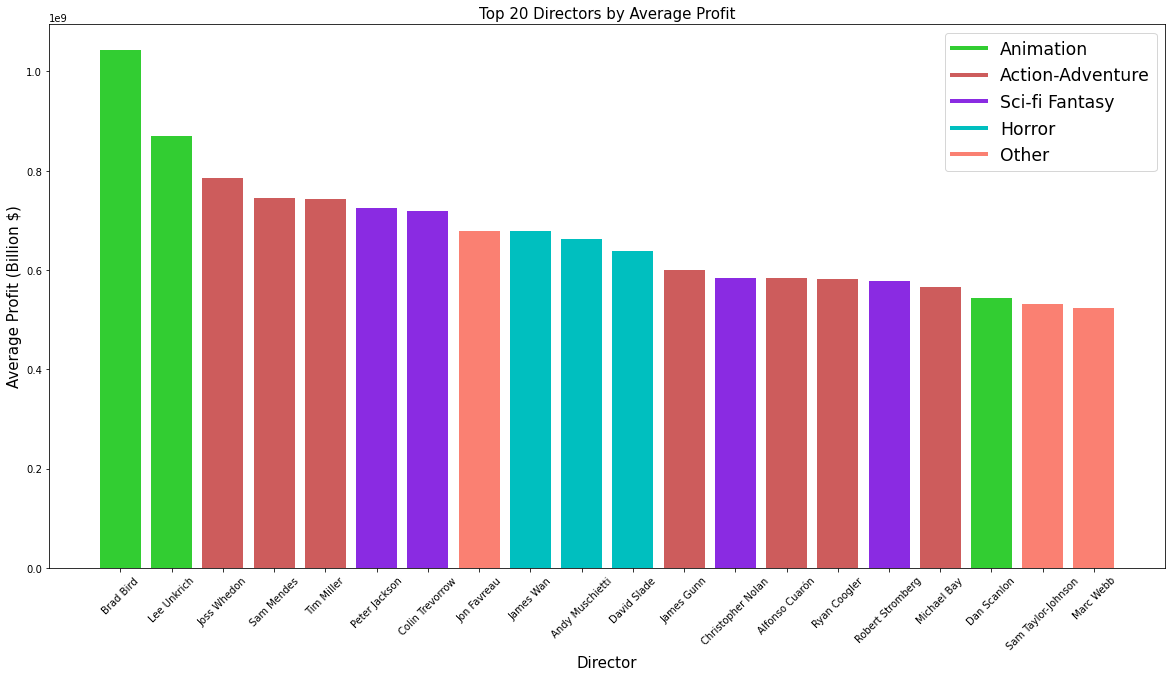

In [41]:
# Plot a bar graph of the most common names 
fig, ax = plt.subplots(figsize = (20,10))

color_index = ['limegreen','limegreen','indianred','indianred',
               'indianred','blueviolet','blueviolet','salmon','c','c','c',
               'indianred','blueviolet','indianred','indianred','blueviolet',
               'indianred','limegreen','salmon','salmon']
ax.bar(directors_group_top_profit.index, directors_group_top_profit['profit'],color = color_index)

# Add labels for x and y axes
ax.set_xlabel('Director', fontsize = 15)
ax.set_ylabel('Average Profit (Billion $)', fontsize = 15)

#setting color
custom_lines = [Line2D([0], [0], color="limegreen", lw=4),
                Line2D([0], [0], color="indianred", lw=4),
                Line2D([0], [0], color="blueviolet", lw=4),
                Line2D([0], [0], color="c", lw=4),
                Line2D([0], [0], color ="salmon",lw=4)]

# Add a title for the plot
ax.set_title('Top 20 Directors by Average Profit', fontsize=15)

ax.tick_params(axis='x', labelrotation = 45)

# add a legend 
plt.legend(custom_lines, ['Animation', 'Action-Adventure', 'Sci-fi Fantasy','Horror', 'Other'], fontsize="xx-large")

###
fig.savefig('Top_20_directors.pdf')

Switch to directors avg profit by rating, using costum data set created in other notebook

In [42]:
df = pd.read_csv('Final_data.csv.gz',compression='gzip')

In [43]:
#format string 'known_ratings' to list
def to_int(in_string):
    out = []
    hold_string = in_string;
    try:
        if len(hold_string) == 2:
            return np.NaN
        elif len(hold_string) == 7:
            int_val = in_string[2:5];
            out.append(float(int_val));
        elif len(hold_string) == 14:
            int_val = in_string[2:5];
            out.append (float(int_val));
            int_val_2 = in_string[9:12]
            out.append (float(int_val_2));
        elif len(hold_string) == 21:
            int_val = in_string[2:5];
            out.append (float(int_val));
            int_val_2 = in_string[9:12]
            out.append (float(int_val_2));
            int_val_3 = in_string[16:19];
            out.append(float(int_val_3));
        else:
            int_val = in_string[2:5];
            out.append (float(int_val));
            int_val_2 = in_string[9:12]
            out.append (float(int_val_2));
            int_val_3 = in_string[16:19];
            out.append (float(int_val_3));
            int_val_4 = in_string[23:26];
            out.append(float(int_val_4))
        return out;
    except:
        return np.NaN;
df['known_ratings'] = df['known_ratings'].apply(to_int)

In [44]:
#calculate ratings statistics
def get_avg(in_list):
    return np.average(in_list);

def get_max(in_list):
    return np.amax(in_list);

def get_min(in_list):
    return np.amin(in_list);

df['rate_avg'] = df['known_ratings'].apply(get_avg)
df['rate_max'] = df['known_ratings'].apply(get_max)
df['rate_min'] = df['known_ratings'].apply(get_min)

In [45]:
#group by director
df_grouped = df.groupby(by=['nconst']).mean()
df_grouped.head()

,id,production_budget,domestic_gross,worldwide_gross,profit,return_rate,rate_avg,rate_max,rate_min
nconst,,,,,,,,,
nm0000095,58.333333,1.816667e+07,17779013.0,7.049560e+07,5.232893e+07,2.819199,7.925,8.0,7.9
nm0000108,90.000000,1.800000e+08,40479370.0,2.150984e+08,3.509836e+07,0.194991,7.475,8.5,6.4
nm0000110,87.333333,8.833333e+07,111478193.0,3.088756e+08,2.205423e+08,2.824880,7.250,7.7,6.5
nm0000123,45.000000,4.650000e+07,59497077.0,1.182193e+08,7.171934e+07,1.823502,6.950,7.4,6.1
nm0000127,61.500000,3.250000e+07,26462681.5,5.635853e+07,2.385853e+07,0.534419,6.925,7.5,6.4


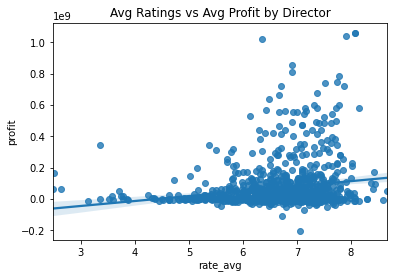

In [46]:
#create regression
ax = sns.regplot(x='rate_avg', y = 'profit',data=df_grouped)
ax.set_title('Avg Ratings vs Avg Profit by Director')
fig = ax.get_figure()
fig.savefig('Profit_by_Ratings.pdf')

## Begin New Dataframe

### Import the Budgets data set.

In [47]:
df = pd.read_csv('data/zippedData/tn.movie_budgets.csv.gz')
df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


### Taking out commas and \$ to make the money columns integers.

In [48]:
df["production_budget"] = df["production_budget"].str.replace(",","").str.replace("$","").astype(int)
df["domestic_gross"] = df["domestic_gross"].str.replace(",","").str.replace("$","").astype(int)
df["worldwide_gross"] = df["worldwide_gross"].str.replace(",","").str.replace("$","").astype(int)
df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0,0
5778,79,"Apr 2, 1999",Following,6000,48482,240495
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0


### Create variable columns Profit and Rate of Return

In [49]:
df['profit'] = df['worldwide_gross'] - df['production_budget']
df['return_rate'] = df['profit']/df['production_budget']

Removing negative values so df_2 is smaller and easier to work with when looking at top movies.

In [50]:
df_2 = df.loc[df['profit'] > 0 ]
df_2

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,return_rate
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,5.532577
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,1.546673
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,3.243841
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,3.153696
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220,5.710167
...,...,...,...,...,...,...,...,...
5773,74,"Feb 26, 1993",El Mariachi,7000,2040920,2041928,2034928,290.704000
5774,75,"Oct 8, 2004",Primer,7000,424760,841926,834926,119.275143
5775,76,"May 26, 2006",Cavite,7000,70071,71644,64644,9.234857
5778,79,"Apr 2, 1999",Following,6000,48482,240495,234495,39.082500


## What Genre Is the most profitible?

### Narrowing down to the top 20 movies sorted by profit

In [51]:
df_profit = df_2.sort_values(by=['profit'], ascending = False )
top_20_profit = df_profit.head(20)
top_20_profit

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,return_rate
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,5.532577
42,43,"Dec 19, 1997",Titanic,200000000,659363944,2208208395,2008208395,10.041042
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,5.827114
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220,5.710167
33,34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,1433854864,6.669092
66,67,"Apr 3, 2015",Furious 7,190000000,353007020,1518722794,1328722794,6.993278
26,27,"May 4, 2012",The Avengers,225000000,623279547,1517935897,1292935897,5.746382
260,61,"Jul 15, 2011",Harry Potter and the Deathly Hallows: Part II,125000000,381193157,1341693157,1216693157,9.733545
41,42,"Feb 16, 2018",Black Panther,200000000,700059566,1348258224,1148258224,5.741291
112,13,"Jun 22, 2018",Jurassic World: Fallen Kingdom,170000000,417719760,1305772799,1135772799,6.681016


### The Bar Chart is colored to show sub genre

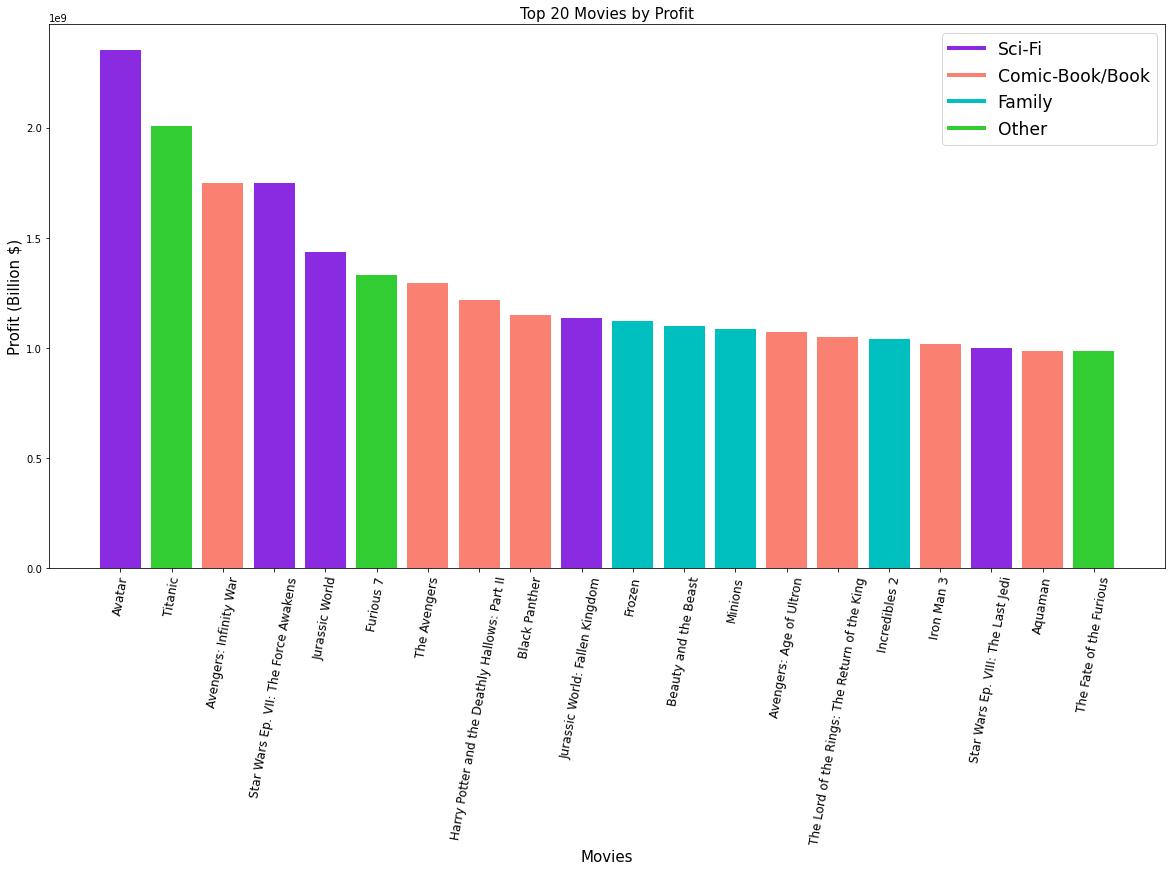

In [52]:
# Plot a bar graph of the most common names 
fig, ax = plt.subplots(figsize = (20,10))


ax.bar(top_20_profit['movie'], top_20_profit['profit'] , color = ['blueviolet','limegreen','salmon','blueviolet','blueviolet','limegreen','salmon','salmon','salmon','blueviolet','c','c','c','salmon','salmon','c','salmon','blueviolet','salmon','limegreen'])

# Add labels for x and y axes
ax.set_xlabel('Movies', fontsize = 15)
ax.set_ylabel('Profit (Billion $)', fontsize = 15)

#setting color
custom_lines = [Line2D([0], [0], color="blueviolet", lw=4),
                Line2D([0], [0], color="salmon", lw=4),
                Line2D([0], [0], color="c", lw=4),
                Line2D([0], [0], color="limegreen", lw=4)]

# Add a title for the plot
ax.set_title('Top 20 Movies by Profit', fontsize=15)

ax.tick_params(axis='x', labelrotation = 80)

# add a legend 
plt.legend(custom_lines, ['Sci-Fi', 'Comic-Book/Book', 'Family', 'Other'], fontsize="xx-large") ###
ax.set_xticklabels(top_20_profit['movie'], fontsize = 12);

## What Movies have the best rate of return?

### Narrowing down to the top 20 movies sorted by Rate of Return

In [53]:
df_return_rate = df_2.sort_values(by=['return_rate'], ascending = False )
df_return_rate = df_return_rate.drop(labels=5745, axis=0)
df_return_rate = df_return_rate.drop(labels=5612, axis=0)
top_20_rate_of_return = df_return_rate.head(20)
top_20_rate_of_return

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,return_rate
5613,14,"Mar 21, 1980",Mad Max,200000,8750000,99750000,99550000,497.750000
5492,93,"Sep 25, 2009",Paranormal Activity,450000,107918810,194183034,193733034,430.517853
5679,80,"Jul 10, 2015",The Gallows,100000,22764410,41656474,41556474,415.564740
5406,7,"Jul 14, 1999",The Blair Witch Project,600000,140539099,248300000,247700000,412.833333
5709,10,"May 7, 2004",Super Size Me,65000,11529368,22233808,22168808,341.058585
5346,47,"Aug 13, 1942",Bambi,858000,102797000,268000000,267142000,311.354312
5773,74,"Feb 26, 1993",El Mariachi,7000,2040920,2041928,2034928,290.704000
5676,77,"Oct 1, 1968",Night of the Living Dead,114000,12087064,30087064,29973064,262.921614
5210,11,"Nov 21, 1976",Rocky,1000000,117235147,225000000,224000000,224.000000
5536,37,"Oct 17, 1978",Halloween,325000,47000000,70000000,69675000,214.384615


### The Bar Chart is colored to show sub genre

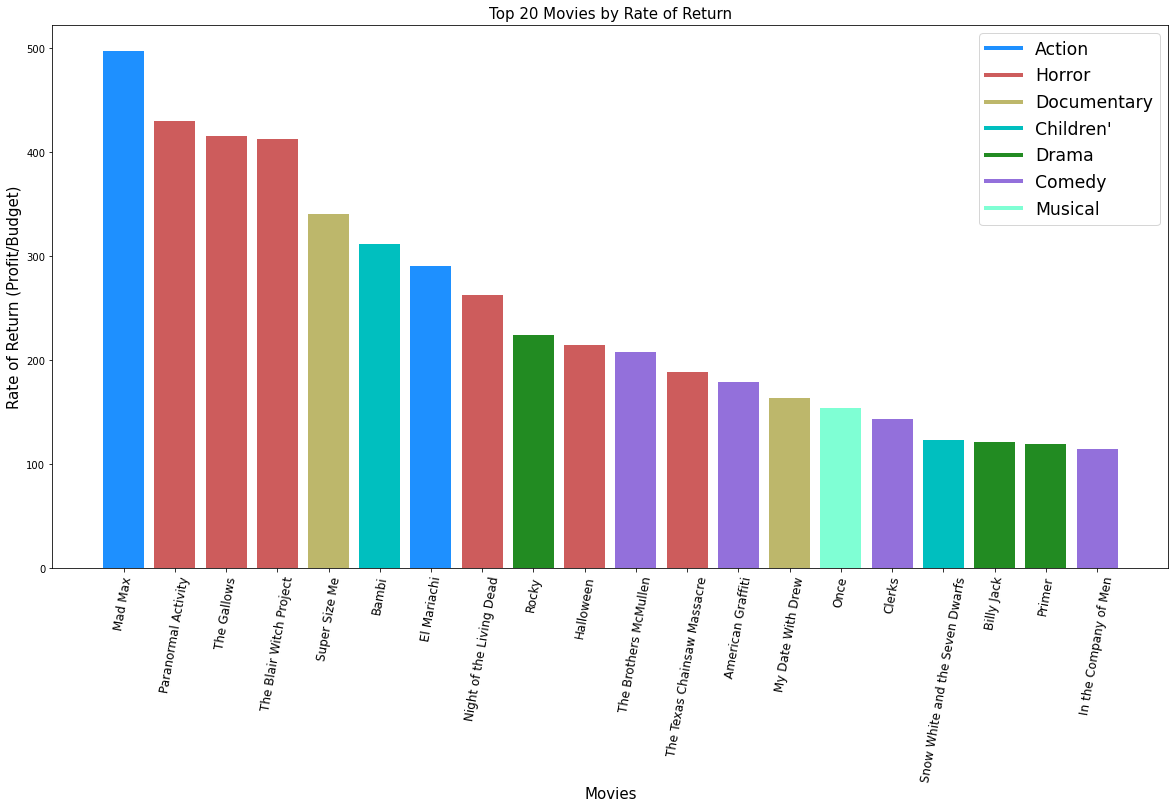

In [54]:
# Plot a bar graph of the most common names 
fig, ax = plt.subplots(figsize = (20,10))


ax.bar(top_20_rate_of_return['movie'], top_20_rate_of_return['return_rate'] , color = ['dodgerblue','indianred','indianred','indianred','darkkhaki','c','dodgerblue','indianred','forestgreen','indianred','mediumpurple','indianred','mediumpurple','darkkhaki','aquamarine','mediumpurple','c','forestgreen','forestgreen','mediumpurple'])

# Add labels for x and y axes
ax.set_xlabel('Movies', fontsize = 15)
ax.set_ylabel('Rate of Return (Profit/Budget)', fontsize = 15)

#setting color
custom_lines = [Line2D([0], [0], color="dodgerblue", lw=4),
                Line2D([0], [0], color="indianred", lw=4),
                Line2D([0], [0], color="darkkhaki", lw=4),
                Line2D([0], [0], color="c", lw=4),
                Line2D([0], [0], color="forestgreen", lw=4),
                Line2D([0], [0], color="mediumpurple", lw=4),
                Line2D([0], [0], color="aquamarine", lw=4)]

# Add a title for the plot
ax.set_title('Top 20 Movies by Rate of Return', fontsize=15)

ax.tick_params(axis='x', labelrotation = 80)

# add a legend 
plt.legend(custom_lines, ['Action', 'Horror', 'Documentary', 'Children\'','Drama','Comedy','Musical'], fontsize="xx-large") ###

ax.set_xticklabels(top_20_rate_of_return['movie'], fontsize = 12);

## What time of year Is the best time to release a movie?

### Sort values by release date

In [55]:
df_release_date = df.sort_values(by=['release_date'] )
df_release_date["release_date"] = df_release_date["release_date"].str.replace(",","")
df_release_date["release_date"] = df_release_date["release_date"].str.replace(" ",",")
df_release_date

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,return_rate
5559,60,"Apr,1,1975",Death Race 2000,300000,0,0,-300000,-1.000000
5520,21,"Apr,1,1986",My Beautiful Laundrette,400000,0,0,-400000,-1.000000
2260,61,"Apr,1,1988","Bright Lights, Big City",25000000,16118077,16118077,-8881923,-0.355277
5769,70,"Apr,1,1996",Bang,10000,527,527,-9473,-0.947300
1408,9,"Apr,1,2005",Sin City,40000000,74103820,158527918,118527918,2.963198
...,...,...,...,...,...,...,...,...
849,50,"Sep,9,2016",Sully,60000000,125070033,238524556,178524556,2.975409
3287,88,"Sep,9,2016",Robinson Crusoe,13000000,8005586,42446455,29446455,2.265112
3712,13,"Sep,9,2016",Kicks,10000000,150191,150191,-9849809,-0.984981
3129,30,"Sep,9,2016",The Disappointments Room,15000000,2423467,3503761,-11496239,-0.766416


### Separate Month Day Year into separate columns

In [56]:
df_release_date['day'] = 1 
df_release_date['year'] = 2
split =  df_release_date['release_date'].str.split(',', expand=True)
df_release_date['month'], df_release_date['day'], df_release_date['year']= split[0], split[1], split[2]
df_release_date

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,return_rate,day,year,month
5559,60,"Apr,1,1975",Death Race 2000,300000,0,0,-300000,-1.000000,1,1975,Apr
5520,21,"Apr,1,1986",My Beautiful Laundrette,400000,0,0,-400000,-1.000000,1,1986,Apr
2260,61,"Apr,1,1988","Bright Lights, Big City",25000000,16118077,16118077,-8881923,-0.355277,1,1988,Apr
5769,70,"Apr,1,1996",Bang,10000,527,527,-9473,-0.947300,1,1996,Apr
1408,9,"Apr,1,2005",Sin City,40000000,74103820,158527918,118527918,2.963198,1,2005,Apr
...,...,...,...,...,...,...,...,...,...,...,...
849,50,"Sep,9,2016",Sully,60000000,125070033,238524556,178524556,2.975409,9,2016,Sep
3287,88,"Sep,9,2016",Robinson Crusoe,13000000,8005586,42446455,29446455,2.265112,9,2016,Sep
3712,13,"Sep,9,2016",Kicks,10000000,150191,150191,-9849809,-0.984981,9,2016,Sep
3129,30,"Sep,9,2016",The Disappointments Room,15000000,2423467,3503761,-11496239,-0.766416,9,2016,Sep


### Movie Release Month VS.Rate of Return

In [57]:
release_date_description = df_release_date.groupby("month")["return_rate"].describe()
release_date_description

,count,mean,std,min,25%,50%,75%,max
month,,,,,,,,
Apr,454.0,2.776726,9.499173,-1.0,-0.594553,0.399866,2.200956,88.586336
Aug,496.0,4.380376,21.831653,-1.0,-0.520832,0.682874,2.491990,311.354312
Dec,745.0,2.268624,7.620173,-1.0,-0.797278,0.628805,2.606233,123.277880
Feb,392.0,3.547812,16.939387,-1.0,-0.506205,0.740280,2.881151,290.704000
Jan,347.0,3.198986,11.622580,-1.0,-0.599711,0.512054,3.045932,121.500000
Jul,440.0,5.040113,28.871610,-1.0,-0.115222,1.244067,3.425571,415.564740
Jun,479.0,6.889714,82.475456,-1.0,-0.273736,1.252110,3.480891,1799.000000
Mar,470.0,3.449646,23.971119,-1.0,-0.490590,0.531329,2.468968,497.750000
May,407.0,4.351029,20.738396,-1.0,-0.426954,1.075749,3.267132,341.058585


### Order The Terms by Month

In [58]:
new_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

release_date_description = release_date_description.reindex(new_order, axis=0)
release_date_description

,count,mean,std,min,25%,50%,75%,max
month,,,,,,,,
Jan,347.0,3.198986,11.622580,-1.0,-0.599711,0.512054,3.045932,121.500000
Feb,392.0,3.547812,16.939387,-1.0,-0.506205,0.740280,2.881151,290.704000
Mar,470.0,3.449646,23.971119,-1.0,-0.490590,0.531329,2.468968,497.750000
Apr,454.0,2.776726,9.499173,-1.0,-0.594553,0.399866,2.200956,88.586336
May,407.0,4.351029,20.738396,-1.0,-0.426954,1.075749,3.267132,341.058585
Jun,479.0,6.889714,82.475456,-1.0,-0.273736,1.252110,3.480891,1799.000000
Jul,440.0,5.040113,28.871610,-1.0,-0.115222,1.244067,3.425571,415.564740
Aug,496.0,4.380376,21.831653,-1.0,-0.520832,0.682874,2.491990,311.354312
Sep,493.0,2.824510,20.535113,-1.0,-0.668707,0.300893,1.981620,430.517853


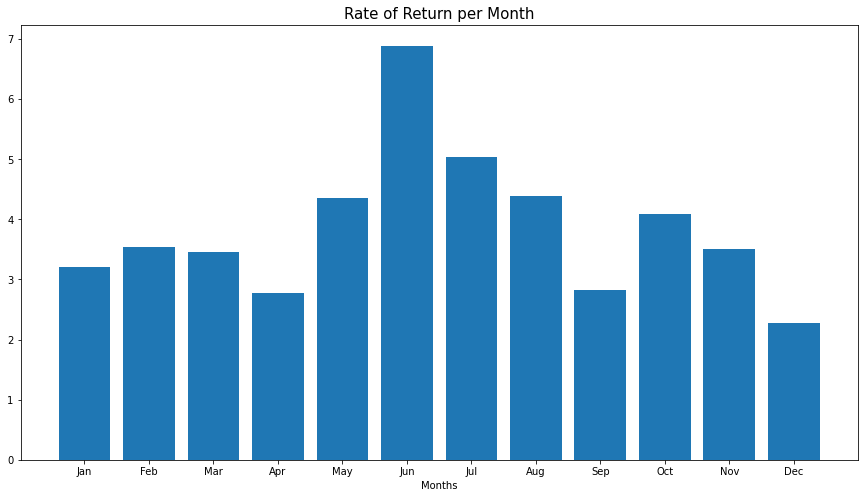

In [59]:
# Plot a bar graph of the most common names 
fig, ax = plt.subplots(figsize = (15,8))


ax.bar(release_date_description.index, release_date_description['mean'] )

# Add labels for x and y axes
ax.set_xlabel('Months')


# Add a title for the plot
ax.set_title('Rate of Return per Month', fontsize=15)

ax.tick_params(axis='x', labelrotation = 0)

### Movie Release Month VS. Profit

In [60]:
release_date_description_2 = df_release_date.groupby("month")["profit"].describe()
release_date_description_2

,count,mean,std,min,25%,50%,75%,max
month,,,,,,,,
Apr,454.0,3.611743e+07,1.340386e+08,-94635231.0,-2361000.50,4639885.0,3.111006e+07,1.748134e+09
Aug,496.0,3.542232e+07,7.962152e+07,-92905005.0,-3058056.75,6972068.5,4.559244e+07,6.328063e+08
Dec,745.0,6.844157e+07,1.842696e+08,-150000000.0,-2293832.00,7836366.0,7.501533e+07,2.351345e+09
Feb,392.0,4.349811e+07,1.055342e+08,-82000000.0,-3477875.50,10443556.0,5.249171e+07,1.148258e+09
Jan,347.0,2.572033e+07,5.757565e+07,-75978328.0,-3124897.00,5322212.0,3.774160e+07,3.775991e+08
Jul,440.0,9.841746e+07,1.830251e+08,-61583254.0,-301360.00,21117855.5,1.101144e+08,1.216693e+09
Jun,479.0,9.942391e+07,1.884004e+08,-200237650.0,-885968.50,21129194.0,1.374956e+08,1.433855e+09
Mar,470.0,4.985129e+07,1.240377e+08,-110450242.0,-2000000.00,7811580.5,5.059461e+07,1.099200e+09
May,407.0,1.151328e+08,2.075069e+08,-50274337.0,-1365510.50,13609577.0,1.297137e+08,1.292936e+09


### Order The Terms by Month

In [61]:
new_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

release_date_description_2 = release_date_description_2.reindex(new_order, axis=0)
release_date_description_2

,count,mean,std,min,25%,50%,75%,max
month,,,,,,,,
Jan,347.0,2.572033e+07,5.757565e+07,-75978328.0,-3124897.00,5322212.0,3.774160e+07,3.775991e+08
Feb,392.0,4.349811e+07,1.055342e+08,-82000000.0,-3477875.50,10443556.0,5.249171e+07,1.148258e+09
Mar,470.0,4.985129e+07,1.240377e+08,-110450242.0,-2000000.00,7811580.5,5.059461e+07,1.099200e+09
Apr,454.0,3.611743e+07,1.340386e+08,-94635231.0,-2361000.50,4639885.0,3.111006e+07,1.748134e+09
May,407.0,1.151328e+08,2.075069e+08,-50274337.0,-1365510.50,13609577.0,1.297137e+08,1.292936e+09
Jun,479.0,9.942391e+07,1.884004e+08,-200237650.0,-885968.50,21129194.0,1.374956e+08,1.433855e+09
Jul,440.0,9.841746e+07,1.830251e+08,-61583254.0,-301360.00,21117855.5,1.101144e+08,1.216693e+09
Aug,496.0,3.542232e+07,7.962152e+07,-92905005.0,-3058056.75,6972068.5,4.559244e+07,6.328063e+08
Sep,493.0,2.488078e+07,6.573886e+07,-73699549.0,-3876149.00,1410835.0,3.100830e+07,6.624580e+08


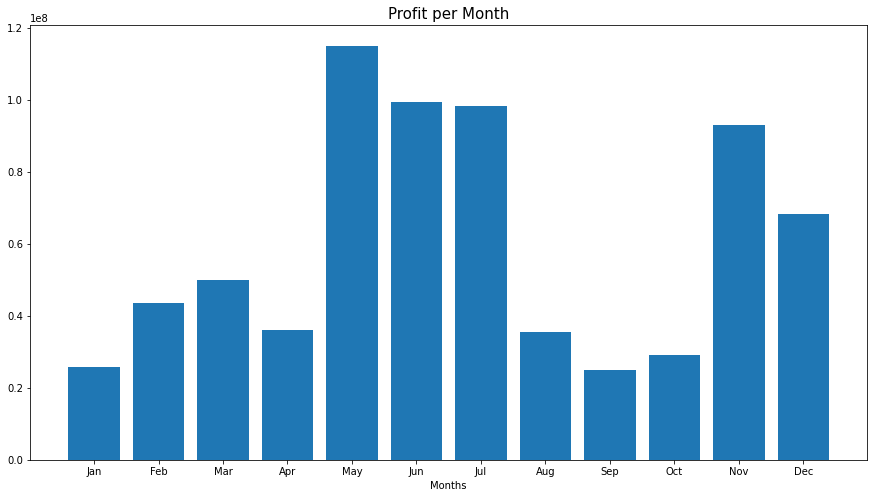

In [62]:
# Plot a bar graph of the most common names 
fig, ax = plt.subplots(figsize = (15,8))


ax.bar(release_date_description_2.index, release_date_description_2['mean'] )

# Add labels for x and y axes
ax.set_xlabel('Months')


# Add a title for the plot
ax.set_title('Profit per Month', fontsize=15)

ax.tick_params(axis='x', labelrotation = 0)

## New DataFrame

### Here I am using the pd.read_csv function inside of pandas to read and pull up the dataframe in my notebook

In [63]:
df3 = pd.read_csv('data/zippedData/rotten_tomatoes_movies.csv.gz')
df3

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
1,m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,...,Sony Pictures Classics,Certified-Fresh,87.0,142.0,Upright,64.0,11574.0,44,123,19
2,m/10,10,"A successful, middle-aged Hollywood songwriter...",Blake Edwards' bawdy comedy may not score a pe...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,...,Waner Bros.,Fresh,67.0,24.0,Spilled,53.0,14684.0,2,16,8
3,m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),Following the closing arguments in a murder tr...,Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,...,Criterion Collection,Certified-Fresh,100.0,54.0,Upright,97.0,105386.0,6,54,0
4,m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea","In 1866, Professor Pierre M. Aronnax (Paul Luk...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,...,Disney,Fresh,89.0,27.0,Upright,74.0,68918.0,5,24,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17707,m/zoot_suit,Zoot Suit,Mexican-American gangster Henry Reyna (Daniel ...,NaN,R,"Drama, Musical & Performing Arts",Luis Valdez,Luis Valdez,"Daniel Valdez, Edward James Olmos, Charles Aid...",1981-10-02,...,MCA Universal Home Video,Rotten,56.0,9.0,Upright,74.0,1195.0,2,5,4
17708,m/zootopia,Zootopia,From the largest elephant to the smallest shre...,The brilliantly well-rounded Zootopia offers a...,PG,"Action & Adventure, Animation, Comedy","Byron Howard, Rich Moore, Jared Bush","Jared Bush, Phil Johnston","J.K. Simmons, Kristen Bell, Octavia Spencer, A...",2016-03-04,...,Walt Disney Animation Studios,Certified-Fresh,98.0,291.0,Upright,92.0,101511.0,50,285,7
17709,m/zorba_the_greek,Zorba the Greek,Traveling to inspect an abandoned mine his fat...,NaN,NR,"Action & Adventure, Art House & International,...",NaN,NaN,"Anthony Quinn, Alan Bates, Irene Papas, Lila K...",1964-12-17,...,Fox,Fresh,80.0,10.0,Upright,86.0,7146.0,0,8,2
17710,m/zulu,Zulu,"In 1879, the Zulu nation hands colonial Britis...",Zulu patiently establishes a cast of colorful ...,PG,"Classics, Drama","Cy Endfield, Cyril Endfield","Cy Endfield, John Prebble","Stanley Baker, Jack Hawkins, Ulla Jacobsson, J...",1964-06-17,...,Paramount Pictures,Fresh,96.0,23.0,Upright,91.0,30193.0,6,22,1


### df3.info() was used here in order to see where my null values are located and what columns i truly need to look at in this project

In [64]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17712 entries, 0 to 17711
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   rotten_tomatoes_link              17712 non-null  object 
 1   movie_title                       17712 non-null  object 
 2   movie_info                        17391 non-null  object 
 3   critics_consensus                 9134 non-null   object 
 4   content_rating                    17712 non-null  object 
 5   genres                            17693 non-null  object 
 6   directors                         17518 non-null  object 
 7   authors                           16170 non-null  object 
 8   actors                            17360 non-null  object 
 9   original_release_date             16546 non-null  object 
 10  streaming_release_date            17328 non-null  object 
 11  runtime                           17398 non-null  float64
 12  prod

### Creating the exact data frame that I can work with by only adding the colums in which I need to access and not using the others

In [65]:
df3_0 = df3[['movie_title', 'genres', 'directors', 
             'tomatometer_rating', 'audience_count']]

### Below I sorted all of the columns in this dataframe by the tomatometer_rating column from 100 to 0
### I used the inplace=True function in order to make the changes update in the dataframe 

In [66]:
df3_0.sort_values(by= 'tomatometer_rating', ascending=False, inplace=True)
df3_0.head(25)

,movie_title,genres,directors,tomatometer_rating,audience_count
16908,Vikings: Journey to New Worlds,Documentary,Marc Fafard,100.0,77.0
2021,5B,Documentary,"Dan Krauss, Paul Haggis",100.0,36.0
17322,Who the #$&% Is Jackson Pollock?,"Documentary, Musical & Performing Arts, Specia...",Harry Moses,100.0,3246.0
6693,Frankenstein,"Horror, Mystery & Suspense",Bernard Rose,100.0,181.0
12044,Primary,"Documentary, Special Interest","Robert Drew, D.A. Pennebaker, Albert Maysles",100.0,231.0
8727,John Mulaney: The Comeback Kid,"Comedy, Television",Rhys Thomas,100.0,24.0
8726,John Mulaney: Kid Gorgeous at Radio City,Comedy,Alex Timbers,100.0,142.0
14716,The Chronicle of Anna Magdalena Bach,"Art House & International, Classics, Drama","Jean-Marie Straub, Danièle Huillet, Jean-Marie...",100.0,581.0
875,Fury,"Classics, Drama, Mystery & Suspense",Fritz Lang,100.0,3092.0
8722,John Leguizamo's Latin History for Morons,Documentary,Ben DeJesus,100.0,148.0


### I used the .mean() function on the audience_count column to find the mean of voters who submitted votes on Rotten Tomatoes in order to see the spread of data in this dataframe

In [67]:
df3_0.audience_count.mean()

143940.06833189778

### In this step I am using the .median() function in order to retrieve an accurate description of the median of this data set to help myself know how whether or not I need to drop rows to make the dataset 

In [68]:
df3_0.audience_count.median()

4277.0

### This step below is applying the .loc function to access a dataframe where the audience_count is greater than 5000 voters to get an accurate look at the movies that would be more successful and have more votes to differentiate between

In [69]:
df_aud_count = df3_0.loc[df3_0['audience_count']> 5000]
df_aud_count### This step below is applying the .loc function to access a dataframe where the audience_count is greater than 5000 voters to get an accurate look at the movies that would be more successful and have more votes to differentiate between

,movie_title,genres,directors,tomatometer_rating,audience_count
5653,Dont Look Back,"Documentary, Musical & Performing Arts, Specia...",D.A. Pennebaker,100.0,5699.0
3654,Black Narcissus,"Classics, Drama, Faith & Spirituality","Michael Powell, Emeric Pressburger",100.0,7271.0
2062,A Bittersweet Life (Dalkomhan insaeng),"Action & Adventure, Art House & International,...",Kim Jee-woon,100.0,10620.0
8786,Ju Dou,"Art House & International, Drama","Zhang Yimou, Yang Fengliang",100.0,5288.0
830,Henry V,"Action & Adventure, Drama, Romance",Kenneth Branagh,100.0,13465.0
...,...,...,...,...,...
8870,K-9: P.I.,"Action & Adventure, Comedy","Charles T. Kanganis, Richard J. Lewis, Rod Daniel",0.0,7615.0
10823,My First Wedding,"Comedy, Drama, Romance",Laurent Firode,0.0,6094.0
10922,National Lampoon's Gold Diggers,Comedy,Gary Preisler,0.0,6571.0
7763,"The Hills Have Eyes, Part 2",Horror,Wes Craven,0.0,10926.0


### Below is the same .mean() and .median() functions to understand what changed about the dataset when I took the movies with less than 5000 voters out of the dataframe

In [70]:
df_aud_count.audience_count.mean()

301203.45478691295

In [71]:
df_aud_count.audience_count.median()

28773.0

### Below is the same style of code as used before where I am sorting the dataframe by the audience_count column 
### But now I am sorting this dataframe and setting it equal to a new dataframe df_aud_count_2

In [72]:
df_aud_count_2 = df_aud_count.sort_values(by= 'audience_count', ascending=False)

### This step is just another sanity check to ensure the code above has been ran sufficiently

In [73]:
df_aud_count_2.head(50)

,movie_title,genres,directors,tomatometer_rating,audience_count
16297,Titanic,"Drama, Romance",James Cameron,89.0,35797635.0
15410,The Lord of the Rings: The Return of the King,"Action & Adventure, Classics, Science Fiction ...",Peter Jackson,93.0,34679773.0
13694,Spider-Man,"Action & Adventure, Mystery & Suspense, Scienc...",Sam Raimi,90.0,34297354.0
13276,Shrek 2,"Animation, Comedy, Kids & Family, Science Fict...","Conrad Vernon, Andrew Adamson, Kelly Asbury",89.0,34232524.0
7526,Harry Potter and the Goblet of Fire,"Action & Adventure, Kids & Family, Science Fic...",Mike Newell,88.0,34153607.0
7052,Gladiator,"Action & Adventure, Classics, Drama",Ridley Scott,77.0,34128168.0
4579,"The Chronicles of Narnia: The Lion, The Witch ...","Kids & Family, Science Fiction & Fantasy",Andrew Adamson,76.0,34105114.0
2662,American Pie,Comedy,"Paul Weitz, Chris Weitz",61.0,33781574.0
9014,King Kong,Action & Adventure,Peter Jackson,84.0,33766734.0
13797,Star Wars: Episode III - Revenge of the Sith,"Action & Adventure, Drama, Science Fiction & F...",George Lucas,80.0,33683838.0


### df_aud_count_3 has been set equal to the top 1000 rows of the df_aud_count_2 dataframe

In [74]:
df_aud_count_3 =df_aud_count_2.head(1000)

### Below is another function to make the dataframe be sorted by the tomatometer_rating column from greatest to least

In [75]:
df_aud_count_3.sort_values(by= 'tomatometer_rating', ascending=False, inplace=True)

### Below is a code that I tried to split the genres column at the comma in each genre in the column

In [76]:
df_aud_count_3['genres'] = df_aud_count_3['genres'].str.split(",")
df_aud_count_3

,movie_title,genres,directors,tomatometer_rating,audience_count
10156,Mary Poppins,"[Classics, Comedy, Kids & Family, Musical &...",Robert Stevenson,100.0,682486.0
16406,Toy Story 2,"[Animation, Comedy, Kids & Family]",John Lasseter,100.0,1000505.0
11852,Pinocchio,"[Animation, Kids & Family, Musical & Perform...","Hamilton Luske, Ben Sharpsteen, Walt Disney, W...",100.0,279410.0
14336,The Terminator,"[Action & Adventure, Science Fiction & Fantasy]",James Cameron,100.0,776580.0
16405,Toy Story,"[Animation, Comedy, Kids & Family]",John Lasseter,100.0,1109209.0
...,...,...,...,...,...
7179,Good Luck Chuck,[Comedy],Mark Helfrich,5.0,318784.0
1510,Big Momma's House 2,[Comedy],John Whitesell,5.0,564749.0
4924,The Covenant,"[Horror, Mystery & Suspense]",Renny Harlin,4.0,399932.0
3327,Because I Said So,"[Comedy, Drama, Romance]",Michael Lehmann,4.0,507136.0


### Here is a function that was written to go into each row of the genre column and find where "Action & Adventure" is in the genre , then create another column in the dataframe to say "True" where Action and Adventure, in the genre column, is for every movie 

In [77]:
def is_genre(genres):
    if 'Action & Adventure' in genres:
        return True;
    else:
        return False;

df_aud_count_3['Is_A&A'] = df_aud_count_3['genres'].apply(is_genre)
df_aud_count_3.head()

,movie_title,genres,directors,tomatometer_rating,audience_count,Is_A&A
10156,Mary Poppins,"[Classics, Comedy, Kids & Family, Musical &...",Robert Stevenson,100.0,682486.0,False
16406,Toy Story 2,"[Animation, Comedy, Kids & Family]",John Lasseter,100.0,1000505.0,False
11852,Pinocchio,"[Animation, Kids & Family, Musical & Perform...","Hamilton Luske, Ben Sharpsteen, Walt Disney, W...",100.0,279410.0,False
14336,The Terminator,"[Action & Adventure, Science Fiction & Fantasy]",James Cameron,100.0,776580.0,True
16405,Toy Story,"[Animation, Comedy, Kids & Family]",John Lasseter,100.0,1109209.0,False


### The .info() function used here is used as a check of my new dataframe in order to how clean the dataframe is

In [78]:
df_aud_count_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 10156 to 6054
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie_title         1000 non-null   object 
 1   genres              1000 non-null   object 
 2   directors           984 non-null    object 
 3   tomatometer_rating  1000 non-null   float64
 4   audience_count      1000 non-null   float64
 5   Is_A&A              1000 non-null   bool   
dtypes: bool(1), float64(2), object(3)
memory usage: 47.9+ KB


### Here is a .sum() function where I am looking for how many of the movies in this dataframe have Action and Adventure as a type of genre for the movie

In [79]:
df_aud_count_3['Is_A&A'].sum()

410

### Here is a .loc[] function to create a dataframe called df_AA where only the movies that have an "Action & Adventure"  as a genre are included

In [80]:
df_AA = df_aud_count_3.loc[df_aud_count_3['Is_A&A']==True]

### This is where I sorted the values from 100 go 0 for the Action and Adventure dataframe

In [81]:
df_AA.sort_values(by= 'tomatometer_rating', ascending=False)

,movie_title,genres,directors,tomatometer_rating,audience_count,Is_A&A
14336,The Terminator,"[Action & Adventure, Science Fiction & Fantasy]",James Cameron,100.0,776580.0,True
2858,Apocalypse Now,"[Action & Adventure, Drama]",Francis Ford Coppola,98.0,286037.0,True
8621,Jaws,"[Action & Adventure, Drama, Mystery & Suspense]",Steven Spielberg,98.0,944601.0,True
16762,Up,"[Action & Adventure, Animation, Comedy, Kid...","Linn Patrick, Pete Docter, Bob Peterson, Peter...",98.0,1204027.0,True
5013,"Crouching Tiger, Hidden Dragon","[Action & Adventure, Art House & Internationa...",Ang Lee,97.0,427386.0,True
...,...,...,...,...,...,...
5880,Echelon Conspiracy,"[Action & Adventure, Mystery & Suspense]",Greg Marcks,8.0,1329490.0,True
5,"10,000 B.C.","[Action & Adventure, Classics, Drama]",Roland Emmerich,8.0,411140.0,True
107,Whiteout,"[Action & Adventure, Drama, Mystery & Suspense]",Dominic Sena,7.0,538861.0,True
9234,The Last Airbender,"[Action & Adventure, Kids & Family, Science ...",M. Night Shyamalan,5.0,322458.0,True


### Below are two defined functions, the first was designed to go in and return true and false for each genre in the genre column
### The following function is an updated function that will go in and search for each individual genre in the genre column and and when applied will create a true and false column where each genre is for that particular movie

In [82]:
def is_genre(genres, genre_string):
    if genre_string in genres:
        return True;
    else:
        return False;
    
    
def make_genre_columns(dataframe, genre_list):
    for genre in genre_list:
        dataframe[genre] = dataframe['genres'].apply(lambda x: is_genre(x, genre))
    return dataframe
    
    
  

## Below are the steps taken to determine how many different genres there are
   ### I created a new dataframe, df_aud_count_5 with the .explode() function to separate each individual genre into multiple different genres per movie
   ### Following that I used a function 'unique' to show all of the unique genres that are used in this dataframe
   ### From that I then named the individual genres and applied the make_genre_columns function I defined above to make a boolean column for each individual genre

In [83]:
df_aud_count_5 = df_aud_count_3.explode('genres', ignore_index=False)

In [84]:
def unique(list1):
 
    # intilize a null list
    unique_list = []
     
    # traverse for all elements
    for x in list1:
        # check if exists in unique_list or not
        if x not in unique_list:
            unique_list.append(x)
    # print list
    for x in unique_list:
        print (x,)
        
    

In [85]:
genre_types = df_aud_count_5['genres'].values.tolist()

In [86]:
unique_genre_types = unique( genre_types)

Classics
 Comedy
 Kids & Family
 Musical & Performing Arts
 Science Fiction & Fantasy
Animation
Action & Adventure
 Drama
 Romance
Drama
 Classics
 Mystery & Suspense
 Animation
Kids & Family
Comedy
 Art House & International
 Horror
 Special Interest
Horror
 Sports & Fitness
Documentary
 Western
Art House & International
Mystery & Suspense
 Cult Movies
 Documentary
Science Fiction & Fantasy
Cult Movies
Musical & Performing Arts


In [87]:
make_genre_columns(df_aud_count_3, ["Comedy", "Action & Adventure", "Drama", "Animation", "Kids & Family", "Horror", "Mystery & Suspense", "Cult Movies", "Classics", "Art House & International", "Musical & Performing Arts", "Science Fiction & Fantasy", "Documentary"])





,movie_title,genres,directors,tomatometer_rating,audience_count,Is_A&A,Comedy,Action & Adventure,Drama,Animation,Kids & Family,Horror,Mystery & Suspense,Cult Movies,Classics,Art House & International,Musical & Performing Arts,Science Fiction & Fantasy,Documentary
10156,Mary Poppins,"[Classics, Comedy, Kids & Family, Musical &...",Robert Stevenson,100.0,682486.0,False,False,False,False,False,False,False,False,False,True,False,False,False,False
16406,Toy Story 2,"[Animation, Comedy, Kids & Family]",John Lasseter,100.0,1000505.0,False,False,False,False,True,False,False,False,False,False,False,False,False,False
11852,Pinocchio,"[Animation, Kids & Family, Musical & Perform...","Hamilton Luske, Ben Sharpsteen, Walt Disney, W...",100.0,279410.0,False,False,False,False,True,False,False,False,False,False,False,False,False,False
14336,The Terminator,"[Action & Adventure, Science Fiction & Fantasy]",James Cameron,100.0,776580.0,True,False,True,False,False,False,False,False,False,False,False,False,False,False
16405,Toy Story,"[Animation, Comedy, Kids & Family]",John Lasseter,100.0,1109209.0,False,False,False,False,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7179,Good Luck Chuck,[Comedy],Mark Helfrich,5.0,318784.0,False,True,False,False,False,False,False,False,False,False,False,False,False,False
1510,Big Momma's House 2,[Comedy],John Whitesell,5.0,564749.0,False,True,False,False,False,False,False,False,False,False,False,False,False,False
4924,The Covenant,"[Horror, Mystery & Suspense]",Renny Harlin,4.0,399932.0,False,False,False,False,False,False,True,False,False,False,False,False,False,False
3327,Because I Said So,"[Comedy, Drama, Romance]",Michael Lehmann,4.0,507136.0,False,True,False,False,False,False,False,False,False,False,False,False,False,False


### Here I realized that my 'Is_A&A' column that I had created was no longer useful so I dropped that column and created a new dataframe df_genre

In [88]:
df_genre = df_aud_count_3.drop(["Is_A&A"], axis=1)

### I sorted the df_genre column by tomatometer_rating from 100-0 and created the df_genre2 dataframe

In [89]:
df_genre2 = df_genre.sort_values(by= 'tomatometer_rating', ascending=False)

### df_genre3 was created to bring the column down from 1000 rows to the top 50 rated movies

In [90]:
df_genre3 = df_genre2.head(50)

### Below is a series of .sum() functions in order to find what columns are useful for my graphs to follow 

In [91]:
df_genre3['Comedy'].sum()

4

In [92]:
df_genre3['Action & Adventure'].sum()

19

In [93]:
df_genre3['Drama'].sum()

7

In [94]:
df_genre3['Animation'].sum()

14

In [95]:
df_genre3['Kids & Family'].sum()

1

In [96]:
df_genre3['Horror'].sum()

2

In [97]:
df_genre3['Mystery & Suspense'].sum()

0

In [98]:
df_genre3['Cult Movies'].sum()

0

In [99]:
df_genre3['Classics'].sum()

3

In [100]:
df_genre3['Art House & International'].sum()

0

In [101]:
df_genre3['Musical & Performing Arts'].sum()

0

In [102]:
df_genre3['Science Fiction & Fantasy'].sum()

0

In [103]:
df_genre3['Documentary'].sum()

0

### df_genre4 was created by dropping the columns that were not useful in my dataframe, but the .drop() function can only use up to 8 intakes so I had to do this more than once which is why df_genre5 was also created by dropping the remaining columns that were not "Comedy", "Action & Adventure", "Animation", and "Drama"

In [104]:
df_genre4 =df_genre3.drop(['Documentary', 'Science Fiction & Fantasy', 'Musical & Performing Arts', 'Art House & International'], axis = 1)


In [105]:
df_genre5 = df_genre4.drop(['Kids & Family', 'Horror', 'Mystery & Suspense', 'Cult Movies', 'Classics'], axis = 1)

### df_genre6 is defined by using a .loc[] function to locate where the movies that are one of the 4 genres I am looking at are true so that the other movies are not in there 

In [106]:
df_genre6 = df_genre5.loc[(df_genre5['Comedy']==True) | (df_genre5['Action & Adventure']==True) | (df_genre5['Drama']==True) | (df_genre5['Animation']==True)]


### Just taking a look at the dataframe in question

In [107]:
df_genre6

,movie_title,genres,directors,tomatometer_rating,audience_count,Comedy,Action & Adventure,Drama,Animation
11852,Pinocchio,"[Animation, Kids & Family, Musical & Perform...","Hamilton Luske, Ben Sharpsteen, Walt Disney, W...",100.0,279410.0,False,False,False,True
14336,The Terminator,"[Action & Adventure, Science Fiction & Fantasy]",James Cameron,100.0,776580.0,False,True,False,False
16405,Toy Story,"[Animation, Comedy, Kids & Family]",John Lasseter,100.0,1109209.0,False,False,False,True
16406,Toy Story 2,"[Animation, Comedy, Kids & Family]",John Lasseter,100.0,1000505.0,False,False,False,True
7992,How to Train Your Dragon,"[Animation, Kids & Family, Science Fiction &...","Dean DeBlois, Chris Sanders",99.0,312762.0,False,False,False,True
6453,Finding Nemo,"[Animation, Comedy, Kids & Family]","Andrew Stanton, Lee Unkrich",99.0,33356856.0,False,False,False,True
7092,"The Godfather, Part II","[Drama, Mystery & Suspense]",Francis Ford Coppola,98.0,411461.0,False,False,True,False
2492,Alien,"[Drama, Mystery & Suspense, Science Fiction ...",Ridley Scott,98.0,459868.0,False,False,True,False
749,101 Dalmatians,"[Animation, Classics, Comedy, Kids & Family...","Clyde Geronimi, Hamilton S. Luske, Wolfgang Re...",98.0,709291.0,False,False,False,True
2858,Apocalypse Now,"[Action & Adventure, Drama]",Francis Ford Coppola,98.0,286037.0,False,True,False,False


### Below are the steps taken in order to formulate 4 unique dataframes for each of the genres, Comedy, Action and Adventure, Animation, and Drama where each of those values = True 

In [108]:
df_comedy = df_genre6.loc[(df_genre6['Comedy']==True)]
df_comedy

,movie_title,genres,directors,tomatometer_rating,audience_count,Comedy,Action & Adventure,Drama,Animation
3518,Big,"[Comedy, Kids & Family, Science Fiction & Fa...",Penny Marshall,97.0,401978.0,True,False,False,False
10571,Monty Python and the Holy Grail,[Comedy],"Terry Gilliam, Terry Jones",97.0,644753.0,True,False,False,False
2449,Airplane!,[Comedy],"David Zucker, Jerry Zucker, Jim Abrahams",97.0,291938.0,True,False,False,False
7335,Groundhog Day,"[Comedy, Science Fiction & Fantasy, Special ...",Harold Ramis,96.0,416690.0,True,False,False,False


In [109]:
df_Act_Adv = df_genre6.loc[(df_genre6['Action & Adventure']==True)]
df_Act_Adv

,movie_title,genres,directors,tomatometer_rating,audience_count,Comedy,Action & Adventure,Drama,Animation
14336,The Terminator,"[Action & Adventure, Science Fiction & Fantasy]",James Cameron,100.0,776580.0,False,True,False,False
2858,Apocalypse Now,"[Action & Adventure, Drama]",Francis Ford Coppola,98.0,286037.0,False,True,False,False
16762,Up,"[Action & Adventure, Animation, Comedy, Kid...","Linn Patrick, Pete Docter, Bob Peterson, Peter...",98.0,1204027.0,False,True,False,False
8621,Jaws,"[Action & Adventure, Drama, Mystery & Suspense]",Steven Spielberg,98.0,944601.0,False,True,False,False
4510,Chicken Run,"[Action & Adventure, Animation, Comedy, Dra...","Peter Lord, Nick Park",97.0,548739.0,False,True,False,False
1049,Babe,"[Action & Adventure, Drama, Kids & Family, ...",Chris Noonan,97.0,508807.0,False,True,False,False
6982,Ghostbusters (1984 Original),"[Action & Adventure, Comedy, Science Fiction...",Ivan Reitman,97.0,1039692.0,False,True,False,False
12060,The Princess Bride,"[Action & Adventure, Kids & Family, Science ...",Rob Reiner,97.0,527619.0,False,True,False,False
5013,"Crouching Tiger, Hidden Dragon","[Action & Adventure, Art House & Internationa...",Ang Lee,97.0,427386.0,False,True,False,False
17315,Who Framed Roger Rabbit,"[Action & Adventure, Animation, Comedy, Kid...",Robert Zemeckis,97.0,442722.0,False,True,False,False


In [110]:
df_drama = df_genre6.loc[(df_genre6['Drama']==True)]
df_drama

,movie_title,genres,directors,tomatometer_rating,audience_count,Comedy,Action & Adventure,Drama,Animation
7092,"The Godfather, Part II","[Drama, Mystery & Suspense]",Francis Ford Coppola,98.0,411461.0,False,False,True,False
2492,Alien,"[Drama, Mystery & Suspense, Science Fiction ...",Ridley Scott,98.0,459868.0,False,False,True,False
7091,The Godfather,[Drama],Francis Ford Coppola,98.0,733939.0,False,False,True,False
7194,Good Will Hunting,[Drama],Gus Van Sant,97.0,364798.0,False,False,True,False
12935,Schindler's List,[Drama],Steven Spielberg,97.0,411608.0,False,False,True,False
858,GoodFellas,[Drama],Martin Scorsese,96.0,429632.0,False,False,True,False
7260,Gravity,"[Drama, Science Fiction & Fantasy]",Alfonso Cuarón,96.0,303162.0,False,False,True,False


In [111]:
df_animation = df_genre6.loc[(df_genre6['Animation']==True)]
df_animation

,movie_title,genres,directors,tomatometer_rating,audience_count,Comedy,Action & Adventure,Drama,Animation
11852,Pinocchio,"[Animation, Kids & Family, Musical & Perform...","Hamilton Luske, Ben Sharpsteen, Walt Disney, W...",100.0,279410.0,False,False,False,True
16405,Toy Story,"[Animation, Comedy, Kids & Family]",John Lasseter,100.0,1109209.0,False,False,False,True
16406,Toy Story 2,"[Animation, Comedy, Kids & Family]",John Lasseter,100.0,1000505.0,False,False,False,True
7992,How to Train Your Dragon,"[Animation, Kids & Family, Science Fiction &...","Dean DeBlois, Chris Sanders",99.0,312762.0,False,False,False,True
6453,Finding Nemo,"[Animation, Comedy, Kids & Family]","Andrew Stanton, Lee Unkrich",99.0,33356856.0,False,False,False,True
749,101 Dalmatians,"[Animation, Classics, Comedy, Kids & Family...","Clyde Geronimi, Hamilton S. Luske, Wolfgang Re...",98.0,709291.0,False,False,False,True
5816,Dumbo,"[Animation, Kids & Family, Science Fiction &...","Sam Armstrong, Jack Kinney, Norman Ferguson, W...",98.0,432270.0,False,False,False,True
991,Snow White and the Seven Dwarfs,"[Animation, Classics, Kids & Family, Scienc...","David Hand, William Cottrell, David D. Hand, W...",98.0,470351.0,False,False,False,True
16407,Toy Story 3,"[Animation, Comedy, Kids & Family]",Lee Unkrich,98.0,607537.0,False,False,False,True
13714,Spirited Away,"[Animation, Drama, Kids & Family, Science F...",Hayao Miyazaki,97.0,336970.0,False,False,False,True


### Below are the steps taken to find the number of times each 'True' value is in each dataframe, then set equal to a variable in order to work better in my graph

In [112]:
a = df_animation['Animation'].count()

In [113]:
a_a = df_Act_Adv['Action & Adventure'].count()

In [114]:
d =df_drama['Drama'].count()

In [115]:
c =df_comedy['Comedy'].count()

### Formulating the graph that shows the count of the movies that are in each genre

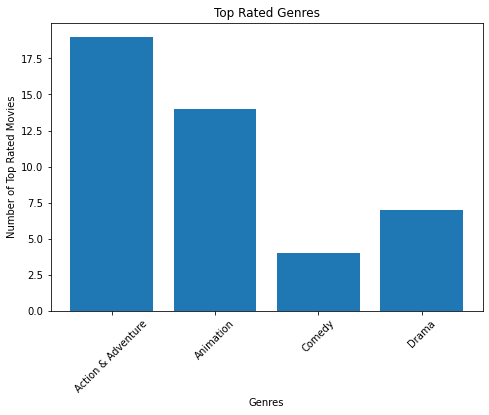

In [116]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])

genres = ['Action & Adventure', 'Animation', 'Comedy', 'Drama']

avgs = [a_a, a, c, d]

ax.bar(genres, avgs)
ax.set_title('Top Rated Genres')
ax.set_xlabel('Genres')
ax.set_ylabel('Number of Top Rated Movies')
ax.tick_params(axis='x', labelrotation = 45)
plt.show();

### Below is another few steps like before where I made each dataframe for the particular genres, but now I am using 1000 movies to help with the distribution of each genre in my next graph

In [117]:
df_stdv = df_aud_count_3.sort_values(by = 'tomatometer_rating', ascending=False)

In [118]:
df_com_stdv = df_stdv.loc[df_stdv['Comedy']==True]

In [119]:
df_act_adv_stdv = df_stdv.loc[df_stdv['Action & Adventure']==True]

In [120]:
df_animation_stdv = df_stdv.loc[df_stdv['Animation']==True]

In [121]:
df_drama_stdv = df_stdv.loc[df_stdv['Drama']==True]

### These are the steps taken to formulate the distribution graph for each genre with 1000 total movies

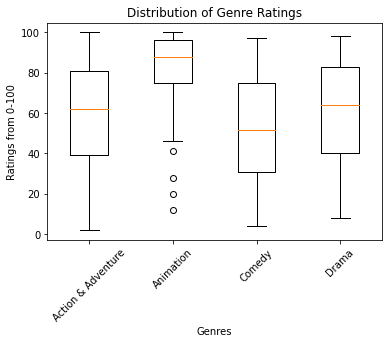

In [122]:
data = [df_act_adv_stdv.tomatometer_rating,
        df_animation_stdv.tomatometer_rating,
        df_com_stdv.tomatometer_rating,
        df_drama_stdv.tomatometer_rating]
fig2, ax2 = plt.subplots()
ax2.set_title('Distribution of Genre Ratings')
ax2.set_xlabel('Genres')
ax2.set_ylabel('Ratings from 0-100')
ax2.set_xticklabels(['Action & Adventure', 'Animation', 'Comedy', 'Drama'])
ax2.tick_params(axis='x', labelrotation = 45)
plt.boxplot(data)
plt.show();






In [123]:
print('THE END')
print('By: Andrew Calkins, Cameron DeArman, and Hayden Johnson')

THE END
By: Andrew Calkins, Cameron DeArman, and Hayden Johnson
